# Regresion Problem

In [1]:
from data.config import *
from data.dataset import *
from report.dumps import *
from nn.model import model
from nn.funcs import *
import numpy as np

def test(nn, ds, verbose=False, phase="Validation", acc_func=batch_hits):
    ds.reset()
    hits = 0
    mean_loss = 0
    
    while not(ds.iter_done()):
        x, y = ds.next()
        o, batch_loss = nn.forward(x, y, train=False)
        hits += np.sum(acc_func(o, y))
        mean_loss += np.sum(batch_loss)
        #if verbose:
        #    print("Loss: " + str(mean_loss), " Predicted: " + str(o), " Expected: " + str(y))
    accuracy = float(hits) / float(ds.size)
    mean_loss = float(mean_loss) / float(ds.size)
    if verbose:
        print(f"{phase} Accuracy: {str(accuracy)} Mean Loss {str(mean_loss)}")
    return accuracy, mean_loss

def train(nn, hp, val_hist, train_hist, logger, acc_func=batch_hits):
    cur_epoch = 1
    cur_iter = 1
    for i in range(1, hp.epochs+1):
        train_loss = 0
        hits = 0
        cur_trained = 0
        while not(hp.ds_train.iter_done()):
            x, y = hp.ds_train.next()
            #print(y)
            o, batch_loss = nn.forward(x, y)
            nn.backward(y,o)
            nn.update(hp.lr)

            hits += np.sum(acc_func(o, y))
            cur_trained += len(x)
            train_loss += np.sum(batch_loss)

            if cur_iter % hp.validate_every_no_of_batches == 0:

                train_accuracy = float(hits) / float(cur_trained)
                train_loss = float(train_loss) / float(cur_trained)
                train_hist.add(cur_iter, train_loss, train_accuracy)
                logger.write( (cur_epoch, "Training", cur_iter, train_accuracy, train_loss) )
                hits = 0
                train_loss = 0

                val_accuracy, val_loss = test(nn, hp.ds_val, True, acc_func=acc_func)
                val_hist.add(cur_iter, val_loss, val_accuracy)
                logger.write( (cur_epoch, "Val", cur_iter, val_accuracy, val_loss) )
            cur_iter+=1
        cur_epoch+=1
        hp.ds_train.reset()
    return val_hist


# Sigmoid

In [ ]:
hp = hyperparams(ConfigEnum.SIN)

nn = model(hp.input_size, hp.output_size, hp.hidden_shapes, sigmoid, sigmoid_grad, has_dropout=hp.has_dropout, dropout_perc=hp.dropout_perc, loss_type="mse")

val_hist = historian()
train_hist = historian()
logger = nnlogger(hp.output_log, ("Epoch", "Phase", "Iteration", "Accuracy", "Loss") )
train(nn, hp, val_hist, train_hist, logger, acc_func=mean_absolute_error)
test(nn=nn, ds=hp.ds_test, verbose=True, phase="Test", acc_func=mean_absolute_error)
nnplotter.view(val_hist, train_hist) #see results on plot
logger.close()

# Tanh

Validation Accuracy: 187572536.8543544 Mean Loss 3.5185341005990376e+16
Validation Accuracy: 3.700338603961211e+17 Mean Loss 1.3692608958001102e+35
Validation Accuracy: 7.305018062547145e+26 Mean Loss 5.336506057606238e+53
Validation Accuracy: 1.4425441083953232e+36 Mean Loss 2.0809335048453456e+72
Validation Accuracy: nan Mean Loss nan
Validation Accuracy: nan Mean Loss nan
Validation Accuracy: nan Mean Loss nan
Validation Accuracy: nan Mean Loss nan
Validation Accuracy: nan Mean Loss nan
Validation Accuracy: nan Mean Loss nan
Validation Accuracy: nan Mean Loss nan
Validation Accuracy: nan Mean Loss nan
Validation Accuracy: nan Mean Loss nan
Validation Accuracy: nan Mean Loss nan
Validation Accuracy: nan Mean Loss nan
Validation Accuracy: nan Mean Loss nan
Validation Accuracy: nan Mean Loss nan
Validation Accuracy: nan Mean Loss nan
Validation Accuracy: nan Mean Loss nan
Validation Accuracy: nan Mean Loss nan
Validation Accuracy: nan Mean Loss nan
Validation Accuracy: nan Mean Loss na

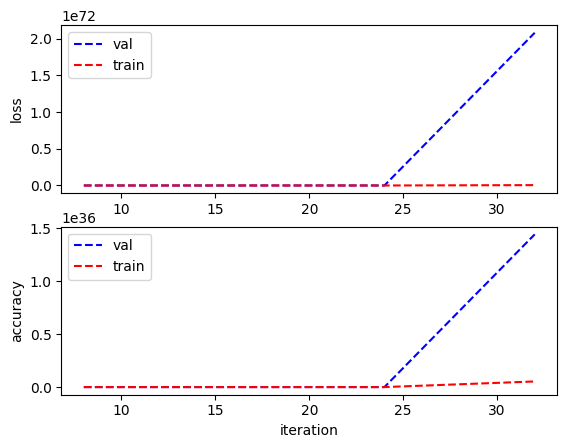

In [5]:
hp = hyperparams(ConfigEnum.SIN)

nn = model(hp.input_size, hp.output_size, hp.hidden_shapes, tanh, tanh_grad, has_dropout=hp.has_dropout, dropout_perc=hp.dropout_perc, loss_type="mse")

val_hist = historian()
train_hist = historian()
logger = nnlogger(hp.output_log, ("Epoch", "Phase", "Iteration", "Accuracy", "Loss") )
train(nn, hp, val_hist, train_hist, logger, acc_func=mean_absolute_error)
test(nn, hp.ds_test, verbose=True, phase="Test", acc_func=mean_absolute_error)
nnplotter.view(val_hist, train_hist) #see results on plot
logger.close()